In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [187]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [188]:
df=pd.DataFrame(train_data)


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [190]:
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [191]:
pd.DataFrame(train_targets)

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
399,19.4
400,25.2
401,19.4
402,19.4


In [192]:
# Standardize the dataset
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


In [193]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [194]:
test_data.max()

711.0

In [195]:
train_data.max()

711.0

In [196]:
# normalization
test_data=tf.cast(test_data/test_data.max(),dtype=tf.float16)
train_data=tf.cast(train_data/train_data.max(),dtype=tf.float16)

In [197]:
train_data

<tf.Tensor: shape=(404, 13), dtype=float16, numpy=
array([[1.734e-03, 0.000e+00, 1.145e-02, ..., 2.954e-02, 5.581e-01,
        2.634e-02],
       [3.064e-05, 1.160e-01, 2.855e-03, ..., 2.068e-02, 5.562e-01,
        4.375e-03],
       [6.889e-03, 0.000e+00, 2.545e-02, ..., 2.841e-02, 5.283e-01,
        4.585e-03],
       ...,
       [4.876e-05, 4.922e-02, 8.522e-03, ..., 2.377e-02, 5.093e-01,
        1.101e-02],
       [3.023e-03, 0.000e+00, 2.754e-02, ..., 2.068e-02, 3.684e-01,
        2.220e-02],
       [2.027e-05, 8.441e-02, 4.120e-03, ..., 2.194e-02, 5.298e-01,
        6.161e-03]], dtype=float16)>

In [198]:
# model Building
tf.random.set_seed(42)
# model Setting
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_data.shape[1],)),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="sigmoid"),
    tf.keras.layers.Dense(1)
])
# model compile
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"]
              )
history=model.fit(tf.expand_dims(train_data,axis=-1),
          train_targets,
          epochs=100,
          verbose=0,
          validation_data=(test_data, test_targets))

In [199]:
model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 83.7826 - mae: 6.5305


[83.7825698852539, 6.530517578125]

<Axes: >

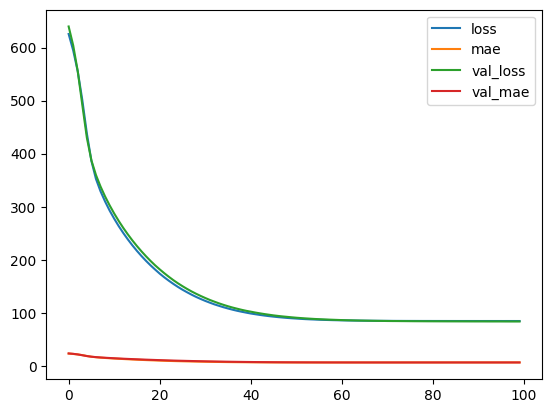

In [200]:
pd.DataFrame(history.history).plot()

In [201]:
model.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 13)                0         
                                                                 
 dense_102 (Dense)           (None, 64)                896       
                                                                 
 dense_103 (Dense)           (None, 64)                4160      
                                                                 
 dense_104 (Dense)           (None, 64)                4160      
                                                                 
 dense_105 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9281 (36.25 KB)
Trainable params: 9281 (36.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4/4 [==============================] - 0s 4ms/step


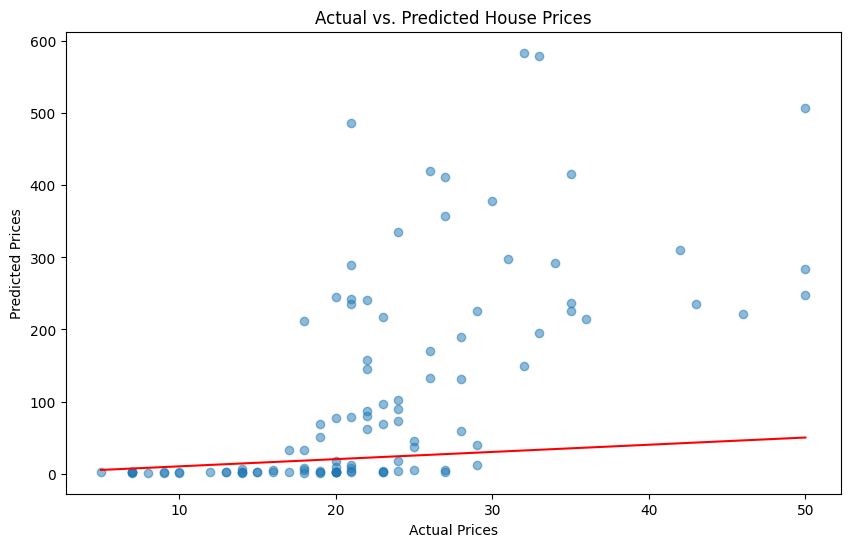

In [220]:
y_pred=model.predict(test_data).flatten()


plt.figure(figsize=(10, 6))
plt.scatter(test_targets, test_predictions, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], color='red') # Ideal line
plt.show()

In [225]:
pd.DataFrame(y_pred)

,0
0,22.348589
1,22.348635
2,22.347185
3,22.348431
4,22.347483
...,...
97,22.348825
98,22.348417
99,22.348562
100,22.348162
